In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [2]:
## Initialising the CNN
classifier = Sequential()

In [3]:
classifier.add(Conv2D(64,(3,3),input_shape = (64,64,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [4]:
## Flattening
classifier.add(Flatten())

In [5]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(units = 128, activation = 'relu'))

In [6]:
#output layer  #softmax for more than 1 classification
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [7]:
## Compliling   when more than 1 classification = sparse_categorical_crossentropy
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
## data importing and transforming and scaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [9]:
## Scaling test data
##no  data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
## Importing training data
train_set = train_datagen.flow_from_directory('D:\\Machine learning\\pizza-assignmentdata-20191219T115019Z-001\\pizza-assignmentdata\\train_set',
                                               target_size=(64, 64),
                                               batch_size=6,
                                               class_mode='binary')

Found 2000 images belonging to 2 classes.


In [13]:
train_set.class_indices

{'Burnt_Pizza': 0, 'Good_Pizza': 1}

In [14]:
## Importng test data
test_set = test_datagen.flow_from_directory('D:\\Machine learning\\pizza-assignmentdata-20191219T115019Z-001\\pizza-assignmentdata\\test_set',
                                            target_size=(64, 64),
                                            batch_size=6,
                                            class_mode='binary')

Found 100 images belonging to 2 classes.


In [15]:
import PIL
from IPython import display

In [16]:
## fitting model to images
classifier.fit_generator(
        train_set,
        steps_per_epoch=50,
        epochs=2,
        validation_data=test_set,
        validation_steps=38)

Epoch 1/2
50/50 [==============================] - 6s 112ms/step - loss: 0.6996 - accuracy: 0.5133 - val_loss: 0.6843 - val_accuracy: 0.7411
Epoch 2/2
50/50 [==============================] - 4s 87ms/step - loss: 0.6845 - accuracy: 0.5733 - val_loss: 0.6843 - val_accuracy: 0.5402


In [20]:
## prediction of single new data
import numpy as np
from tensorflow.keras.preprocessing import image
test_image= image.load_img('D:\\Machine learning\\pizza-assignmentdata-20191219T115019Z-001\\pizza-assignmentdata\\inference\\burnt1.jpg'
                           ,target_size =(64,64))

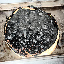

In [21]:
test_image

In [22]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [23]:
## For single prediction change the dimension using axis. To remove problem of batch

test_image=test_image.reshape(1,64,64,3)

In [24]:
result = classifier.predict(test_image)

In [27]:
## Class label 

if result == 1:
    prediction = 'Good Pizza'
else:
    prediction = 'Burnt Pizza'

In [28]:
prediction

'Burnt Pizza'